# K Nearest Neighbour Classifier

### First, start with importing necessary python packages −

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Next, download the iris dataset from its weblink as follows −

In [6]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

### Next, we need to assign column names to the dataset as follows −

In [12]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

### Now, we need to read dataset to pandas dataframe as follows −

In [15]:
dataset = pd.read_csv(path, names=headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Preprocessing will be done with the help of following script lines −

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### Next, we will divide the data into train and test split. Following code will split the dataset into 60% training data and 40% of testing data −

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

### Next, data scaling will be done as follows −

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Next, train the model with the help of KNeighborsClassifier class of sklearn as follows −

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### At last we need to make prediction. It can be done with the help of following script −

In [32]:
y_pred = classifier.predict(X_test)

### Next, print the results as follows −

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[19  0  0]
 [ 0 22  0]
 [ 0  1 18]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.96      1.00      0.98        22
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.98        60
      macro avg       0.99      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Accuracy: 0.9833333333333333


## Data Analysis Part
### Distribution of Target Variable

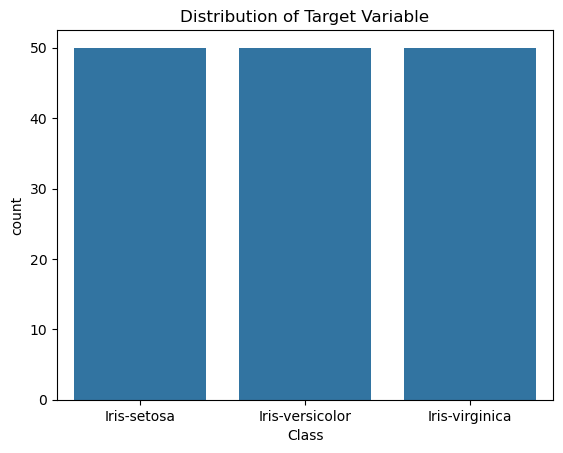

In [48]:
# Plotting the distribution of the target column 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=dataset)
plt.title("Distribution of Target Variable")
plt.show()

### Correlation Heatmap of Features

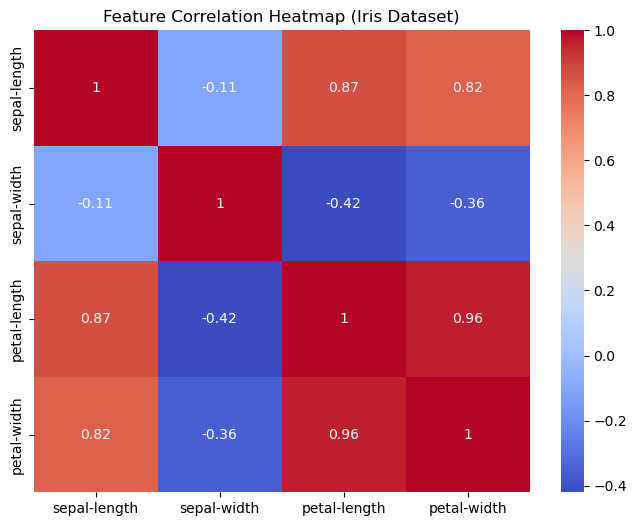

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.drop(columns='Class').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Iris Dataset)")
plt.show()